# Import and Setup Operations



In [1]:
# Upload files (if not already uploaded)
# Make sure don't reload data again.
# Make sure load these 2 files: houses.txt and deeplearning.mplstyle together.

from google.colab import files
uploaded = files.upload()

Saving deeplearning.mplstyle to deeplearning.mplstyle
Saving houses.txt to houses.txt


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')


# Data Importing and Setting

In [3]:
# Load the dataset from the sample_data directory
data = np.loadtxt('houses.txt', delimiter=',')

In [4]:
# Split data into features (X_train) and target (y_train)
X_train = data[:, :4]  # Selecting columns 0 (size), 1 (bedrooms), 2 (floors), 3('age')
y_train = data[:, 4]   # Selecting column 4 (price)

# Feature names
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [5]:
# Create a DataFrame to display the data with feature names
df = pd.DataFrame(X_train, columns=X_features)
df['price'] = y_train  # Add the target (price) as a column

In [6]:
print(df)

    size(sqft)  bedrooms  floors   age  price
0        952.0       2.0     1.0  65.0  271.5
1       1244.0       3.0     1.0  64.0  300.0
2       1947.0       3.0     2.0  17.0  509.8
3       1725.0       3.0     2.0  42.0  394.0
4       1959.0       3.0     2.0  15.0  540.0
..         ...       ...     ...   ...    ...
95      1224.0       2.0     2.0  12.0  329.0
96      1432.0       2.0     1.0  43.0  388.0
97      1660.0       3.0     2.0  19.0  390.0
98      1212.0       3.0     1.0  20.0  356.0
99      1050.0       2.0     1.0  65.0  257.8

[100 rows x 5 columns]


In [7]:
df.head()

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size(sqft)  100 non-null    float64
 1   bedrooms    100 non-null    float64
 2   floors      100 non-null    float64
 3   age         100 non-null    float64
 4   price       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [9]:
df.describe()

,size(sqft),bedrooms,floors,age,price
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1413.710000,2.710000,1.380000,38.650000,362.239520
std,414.249286,0.655898,0.487832,25.914925,104.595007
min,788.000000,0.000000,1.000000,12.000000,158.000000
25%,1091.000000,2.000000,1.000000,17.000000,287.228000
50%,1405.500000,3.000000,1.000000,25.000000,352.900000
75%,1657.000000,3.000000,2.000000,57.250000,426.245000
max,3194.000000,4.000000,2.000000,107.000000,718.200000


In [10]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.84 6.13 2.06 3.68]


# Data Visualization

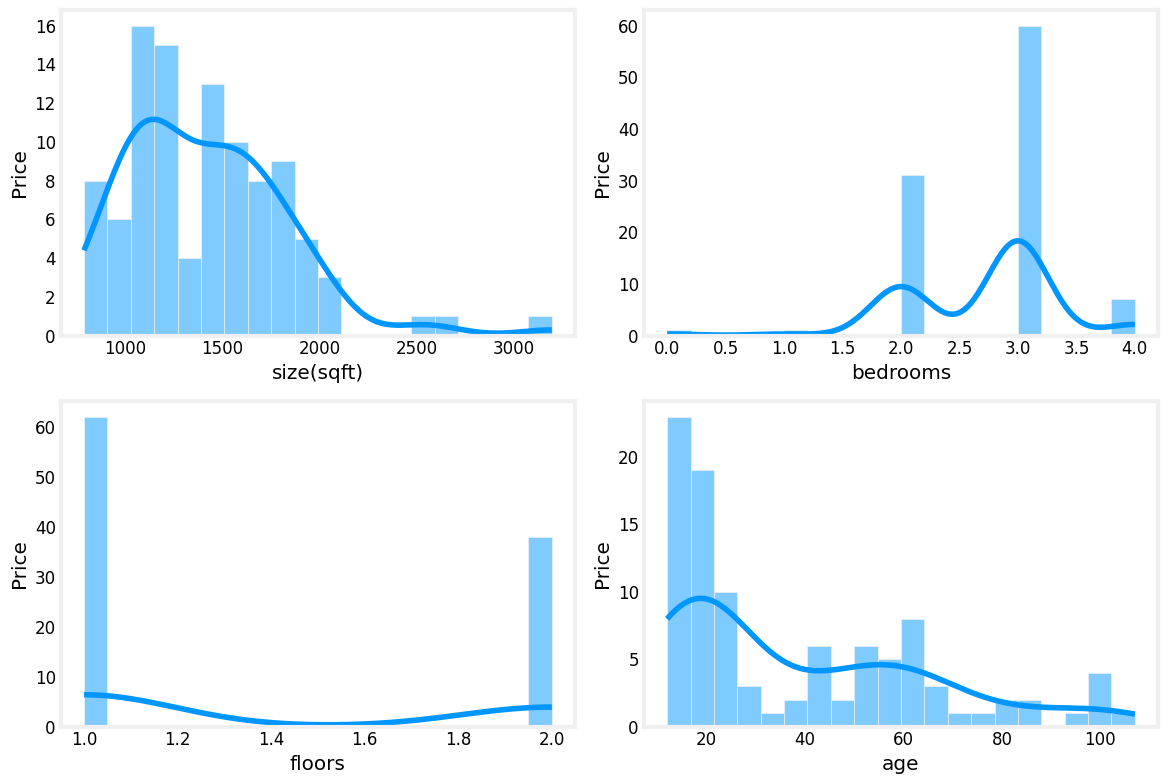

In [11]:
# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [12]:
# Calculate correlation matrix
corr_matrix = df.corr()

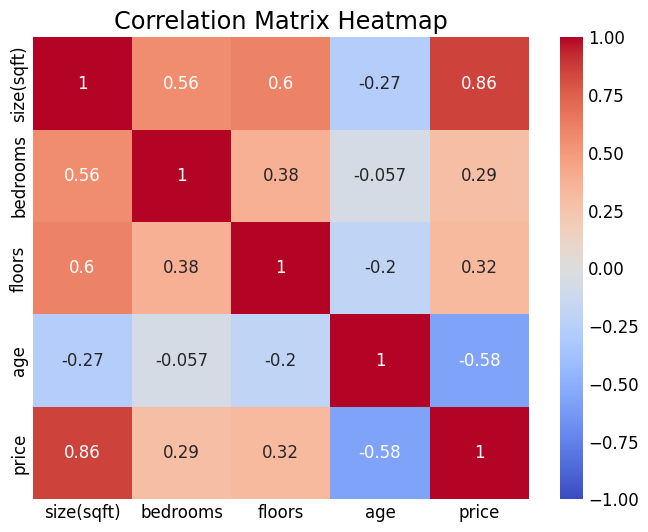

In [13]:
# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Machine learning model (2-class)

## SGDRegressor

In [14]:
# Initialize SGDRegressor and train
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

print(f"SGDRegressor model:")
print(f"Number of iterations completed: {sgdr.n_iter_}")
print(f"Model parameters (w): {sgdr.coef_}, intercept (b): {sgdr.intercept_}")

SGDRegressor model:
Number of iterations completed: 121
Model parameters (w): [110.17 -21.23 -32.37 -37.88], intercept (b): [362.25]


## LinearRegression

In [15]:
# Initialize LinearRegression and train
lr = LinearRegression()
lr.fit(X_norm, y_train)

print(f"\nLinearRegression model:")
print(f"Model coefficients (w): {lr.coef_}, intercept (b): {lr.intercept_}")


LinearRegression model:
Model coefficients (w): [110.61 -21.47 -32.66 -37.78], intercept (b): 362.23952


# Performance Evaluation

In [16]:
# Predictions
y_pred_sgd = sgdr.predict(X_norm)
y_pred_lr = lr.predict(X_norm)

In [17]:
# Calculate performance metrics
mse_sgd = mean_squared_error(y_train, y_pred_sgd)
r2_sgd = r2_score(y_train, y_pred_sgd)

mse_lr = mean_squared_error(y_train, y_pred_lr)
r2_lr = r2_score(y_train, y_pred_lr)

print(f"\nSGDRegressor metrics:")
print(f"MSE: {mse_sgd:.2f}")
print(f"R^2 score: {r2_sgd:.2f}")

print(f"\nLinearRegression metrics:")
print(f"MSE: {mse_lr:.2f}")
print(f"R^2 score: {r2_lr:.2f}")


SGDRegressor metrics:
MSE: 439.54
R^2 score: 0.96

LinearRegression metrics:
MSE: 439.42
R^2 score: 0.96


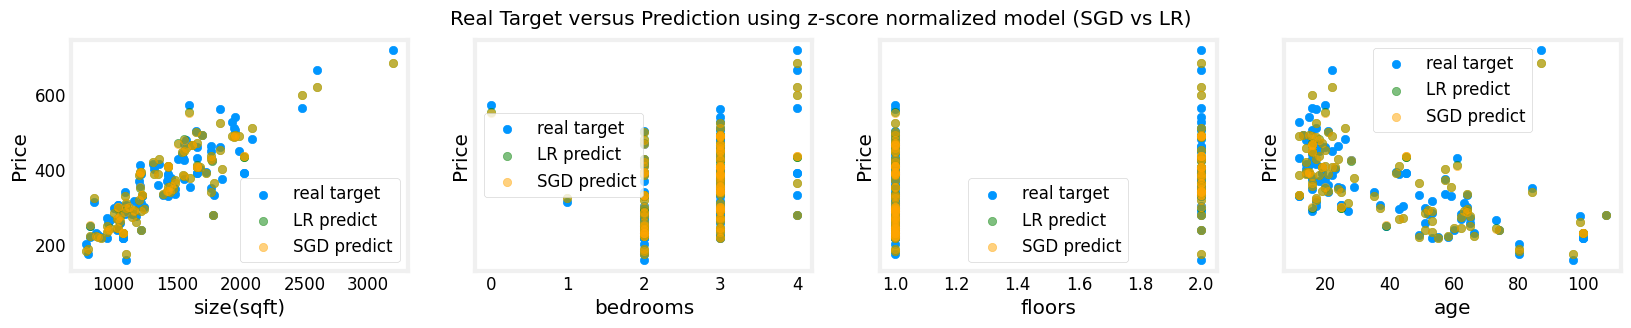

In [18]:
# Create subplots based on the number of features
num_features = X_train.shape[1]
fig, ax = plt.subplots(1, num_features, figsize=(5*num_features, 3), sharey=True)

# Plot target versus prediction
for i in range(num_features):
    ax[i].scatter(X_train[:, i], y_train, label='real target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], y_pred_lr, color='green', label='LR predict', alpha=0.5)
    ax[i].scatter(X_train[:, i], y_pred_sgd, color='orange', label='SGD predict', alpha=0.5)
    ax[i].set_ylabel("Price")
    ax[i].legend()

fig.suptitle("Real Target versus Prediction using z-score normalized model (SGD vs LR)")
plt.show()

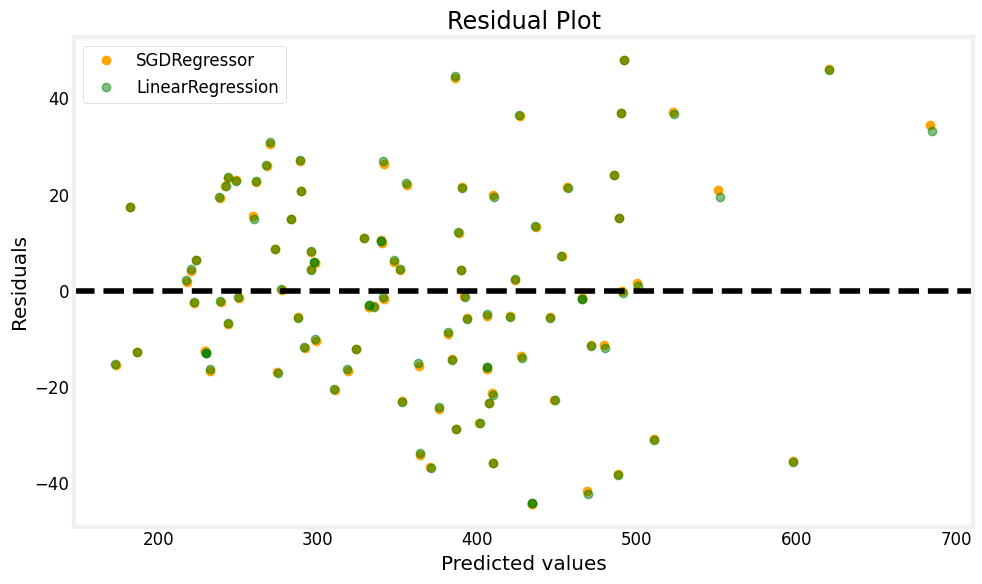

In [19]:
# Calculate residuals
residuals_sgd = y_train - y_pred_sgd
residuals_lr = y_train - y_pred_lr

# Plotting residual plots
plt.figure(figsize=(10, 6))

# Residual plot for SGDRegressor
plt.plot(y_pred_sgd, residuals_sgd, 'o', color='orange', label='SGDRegressor')

# Residual plot for LinearRegression
plt.plot(y_pred_lr, residuals_lr, 'o', color='green', label='LinearRegression', alpha=0.5)

# Horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()
